In [1]:
import os
import torch
import numpy as np
import networkx as nx
from matplotlib import pyplot as plt

from conditional_rate_matching.configs.config_files import ExperimentFiles

from conditional_rate_matching.models.trainers.crm_trainer import CRMTrainer

from conditional_rate_matching.models.generative_models.crm import CRM
from conditional_rate_matching.configs.configs_classes.config_crm import CRMConfig,CRMTrainerConfig,BasicPipelineConfig

from conditional_rate_matching.models.metrics.metrics_utils import MetricsAvaliable

from conditional_rate_matching.models.trainers.call_all_trainers import call_trainer
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig
from conditional_rate_matching.configs.experiments_configs.crm.crm_experiments_music import experiment_music_conditional_config
from conditional_rate_matching.models.temporal_networks.temporal_networks_config import SequenceTransformerConfig
from conditional_rate_matching.configs.configs_classes.config_crm import OptimalTransportSamplerConfig

/home/df630/.conda/envs/conditional_rate_matching/lib/python3.10/site-packages/tqdm-4.66.1-py3.10.egg/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Set Config

In [2]:
device = 'cuda:2'

config:CRMConfig = experiment_music_conditional_config()
config.temporal_network = SequenceTransformerConfig(num_layers=5, num_heads=4)

experiment_files = ExperimentFiles(experiment_name="crm",
                                   experiment_type="tutorial",
                                   experiment_indentifier=None)

config.trainer = CRMTrainerConfig(number_of_epochs=10,
                                  learning_rate=2e-4,
                                  metrics=[MetricsAvaliable.music_plot],
                                  max_test_size=30,
                                  clip_grad = True,
                                  clip_max_norm=1.0,
                                  device = device)

config.thermostat.gamma = 1/129.
config.pipeline = BasicPipelineConfig(number_of_steps=1000)
config.optimal_transport = OptimalTransportSamplerConfig(name="OTSampler", method='sinkhorn', cost='log')


crm_trainer = CRMTrainer(config, experiment_files) # TRAINER CREATES MODEL FROM CONFIG FILE
results_, all_metrics = crm_trainer.train()

OT regularizer for Schrodinger Plan 0.2308551865724012
# ==================================================
# START OF TRAINING 
# ==================================================
# Current Model ************************************
tutorial
crm
None
# ==================================================
# Number of Epochs 10
# ==================================================


Epoch 1, Loss: 3.0510:   0%|          | 0/10 [00:06<?, ?it/s]


KeyboardInterrupt: 

In [3]:
crm_trainer.generative_model.pipeline.number_of_steps = 1000
crm_trainer.generative_model.config.pipeline.time_epsilon = 0.1

sample_x, sample_hist, t = crm_trainer.generative_model.pipeline(sample_size=100, train=False, return_path=True)
sample_x = sample_x.cpu()

time = range(0, 256)
time = torch.tensor(time)
idx=4

fig ,ax = plt.subplots(1,1,figsize=(4,4))
plt.scatter(time, sample_hist.cpu()[idx,-3,:].cpu(), s=10, c='r', marker='o', alpha=0.3)
plt.scatter(time, sample_x.cpu()[idx], s=10, c='b', marker='o', alpha=0.3)

plt.show()

210it [00:16, 12.58it/s]


KeyboardInterrupt: 

# Read and Sample from a Model

In [4]:
crm = CRM(experiment_dir='/home/df630/conditional_rate_matching/results/test_piano_roll_transformer_1000_Epochs_OTlog/crm/1716317127')
crm.config.pipeline.number_of_steps = 100
crm.config.pipeline.time_epsilon = 0.005
x1, x_hist, t = crm.pipeline(sample_size=10, train=False, return_path=True)


Experiment Empty


TypeError: 'NoneType' object is not subscriptable

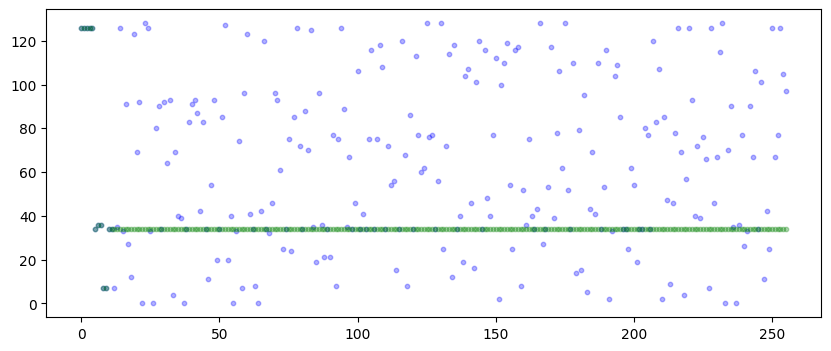

In [80]:
time = range(0, 256)
time = torch.tensor(time)
idx=500
N=0
fig ,ax = plt.subplots(1,1,figsize=(10,4))
plt.scatter(time, x_hist.cpu()[N,idx,:].cpu(), s=10, c='b', marker='o', alpha=0.3)
plt.scatter(time, x1[N].cpu(), s=10, c='g', marker='o', alpha=0.3)

plt.show()

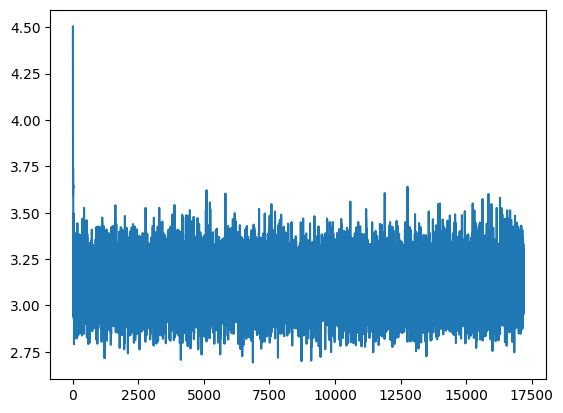

In [89]:
experiment_files = ExperimentFiles(experiment_dir='/home/df630/conditional_rate_matching/results/test_piano_roll_transformer_1000_Epochs_OTlog/crm/1716307020')
results_ = experiment_files.load_results()
plt.plot(results_["all_training_loss"]) 


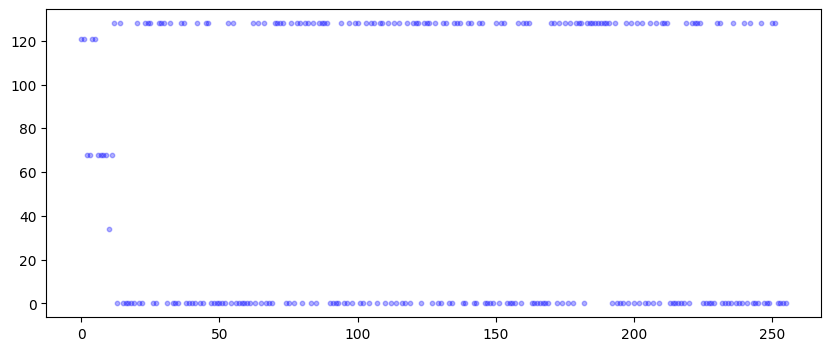

In [85]:
time = range(0, 256)
time = torch.tensor(time)
idx=-1
N=4
fig ,ax = plt.subplots(1,1,figsize=(10,4))
plt.scatter(time, x_hist.cpu()[N,idx,:].cpu(), s=10, c='b', marker='o', alpha=0.3)
# plt.scatter(time, x1[N].cpu(), s=10, c='g', marker='o', alpha=0.3)

plt.show()

# Calculate a Metric Again

In [8]:
from conditional_rate_matching.models.metrics.metrics_utils import log_metrics, MetricsAvaliable
metrics_avaliable = MetricsAvaliable()

In [74]:
# number of samples requiered to calculate the test 
# this number should not be that big as the sample and paths are stored to perform the statistics
# crm.config.pipeline.number_of_steps = 100
# crm.config.data1.test_size 

# log_metrics(crm, epoch=None, all_metrics = {}, metrics_to_log={metrics_avaliable.music_plot})

In [41]:
for b in crm.dataloader_0.train():
    song_0  = b[0][0]
    time = range(0, 256)
    time = torch.tensor(time)
    break

for b in crm.dataloader_1.train():
    song_1 = b[0][0]
    break

### data